## Introduction
* This is an Unsupervised Machine Learning Project to understand the customer characteristics of Kira Plastinina.
### Problem Definition
* Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia.
* The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year.
* More specifically, they would like to learn the characteristics of customer groups.
### Steps Taken
* Problem Definition
* Data Sourcing
* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)
* Implement the Solution
* Challenge the Solution
* Follow up Questions
### Data Sourcing
* The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
  "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related  Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
* The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
* The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Loading the libraries

In [3]:
library(tidyverse)
library(magrittr)
library(warn = -1)

#library(ggbiplot)
library(RColorBrewer)
library(ggplot2)#plotting
library(lattice)
library(corrplot)

library(DataExplorer)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(Rtsne)
library(caret)
library(data.table)# reading the data 

## Data Loading and Exploration

In [4]:
shoppers <- fread("online_shoppers_intention.csv")# using file read method to read the dataset
shoppers <- data.frame(shoppers)
head(shoppers)#checking the first five rows 

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


* checking the first 5 rows 

In [5]:
tail(shoppers)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


* checking the last 5 rows

In [6]:
sapply(shoppers,class)#using sapply method to return a vector of the column datatypes using the class method

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

* the dataset appears to mostly contain numeric and/or integer datatypes with only the month,weekend and revenue columns being non integer

In [7]:
glimpse(shoppers)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "...
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ Browser        

* using the glimpse method to check the values and corresponding datatypes of the columns

In [9]:
dim(shoppers)

[1] 12330    18

* the dataset contains over 12,000 rows and 18 columns 

## Data Cleaning

### handling null values

In [8]:
colSums(is.na(shoppers))#summing up all the individual null values in every column

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

* there exists 14 null values in the first 8 columns which we will drop
* the rational for dropping the nulls is due to the fact that they will not affect the overral quality of the data as the dropped rows only make up > 0.1 % of all the data

In [13]:
shoppers <- na.omit(shoppers)# omit drops all the null values in the dataset

In [14]:
colSums(is.na(shoppers))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

* confirming that all the null values are dropped 

### handling duplicated values

In [15]:
duplicates <- shoppers[duplicated(shoppers),]# checking th duplicated rows in the dataset
dim(duplicates)#returning the number of rows that are duplicated using the dim method

[1] 117  18

* there exists 117 rows in all columns where there are duplicated rows 
* we will proceed to drop these columns as they may affect our analysis ahead

In [16]:
shoppers <- shoppers[!duplicated(shoppers),] # creating a new dataframe specifying not to include the duplicated rowss
duplicated2 <- shoppers[duplicated(shoppers),]# checking if there are any duplicated rows in the columns 
dim(duplicated2)#checking the dimensions of the dataframe with the duplicated rows

[1]  0 18

* our attempts at dropping the duplicated rows was succesfull

### handling Outliers

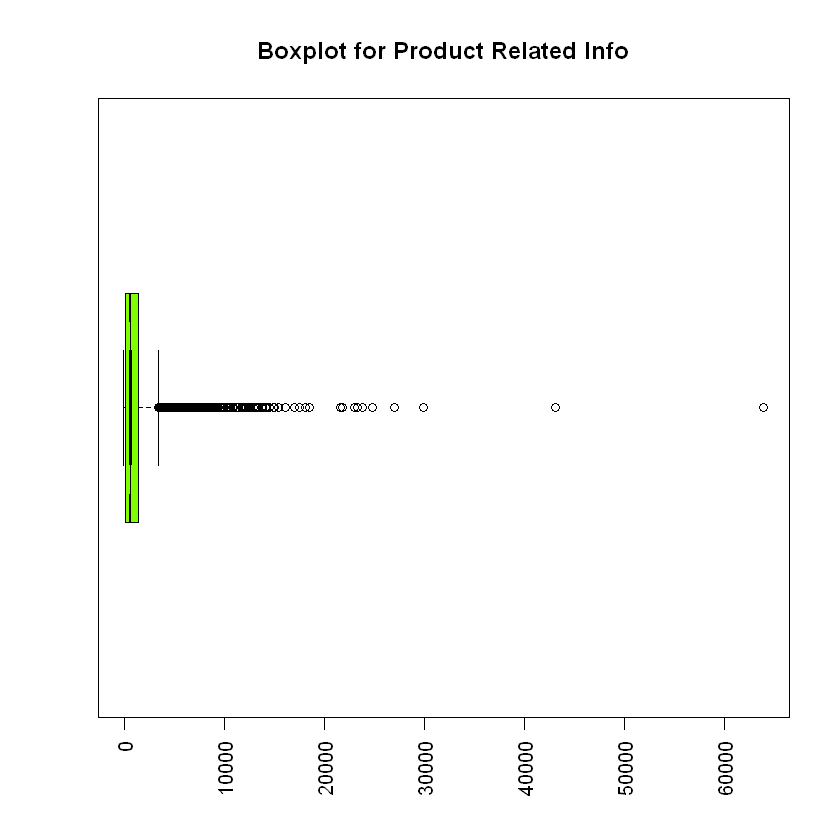

In [17]:
boxplot(shoppers$ProductRelated_Duration,# creating a boxplot of the product related column to help us identify the outliers
    main = "Boxplot for Product Related Info",
at = c(1),
names = c("Product Related Info"),
las = 2,
col = c("chartreuse"),
horizontal = TRUE,
notch = TRUE)

* there exists significant ouliers in the product related info column

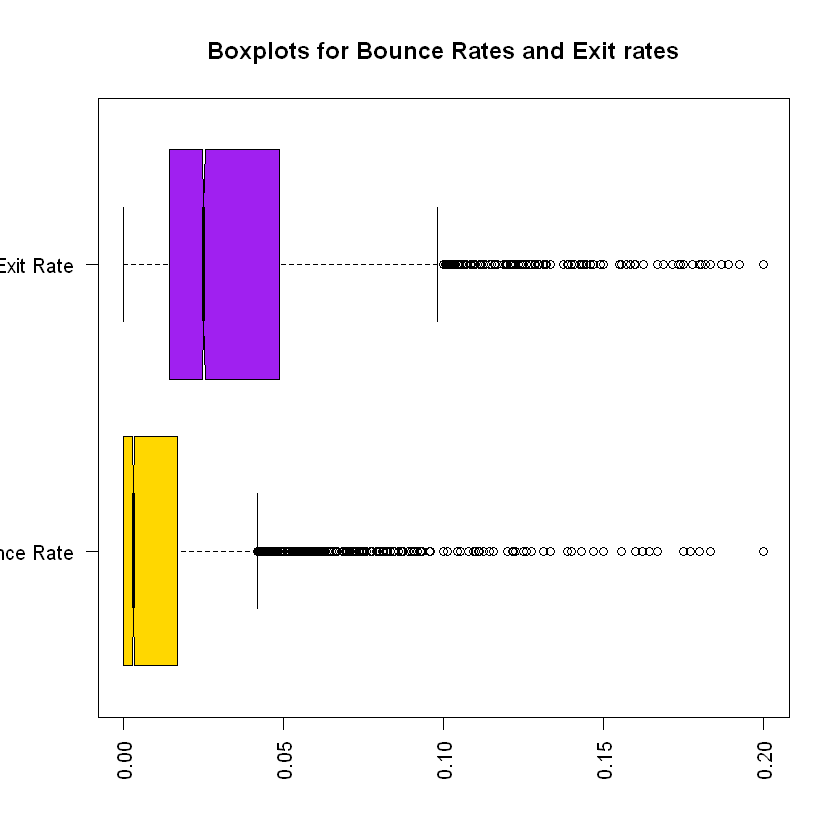

In [18]:
boxplot(shoppers$BounceRates, shoppers$ExitRates,
main = "Boxplots for Bounce Rates and Exit rates",
at = c(1,2),
names = c("Bounce Rate", "Exit Rate"),
las = 2,
col = c("gold","purple"),
horizontal = TRUE,
notch = TRUE
)

* there appears to be moderate outliers in the bounce rates and exit rates column

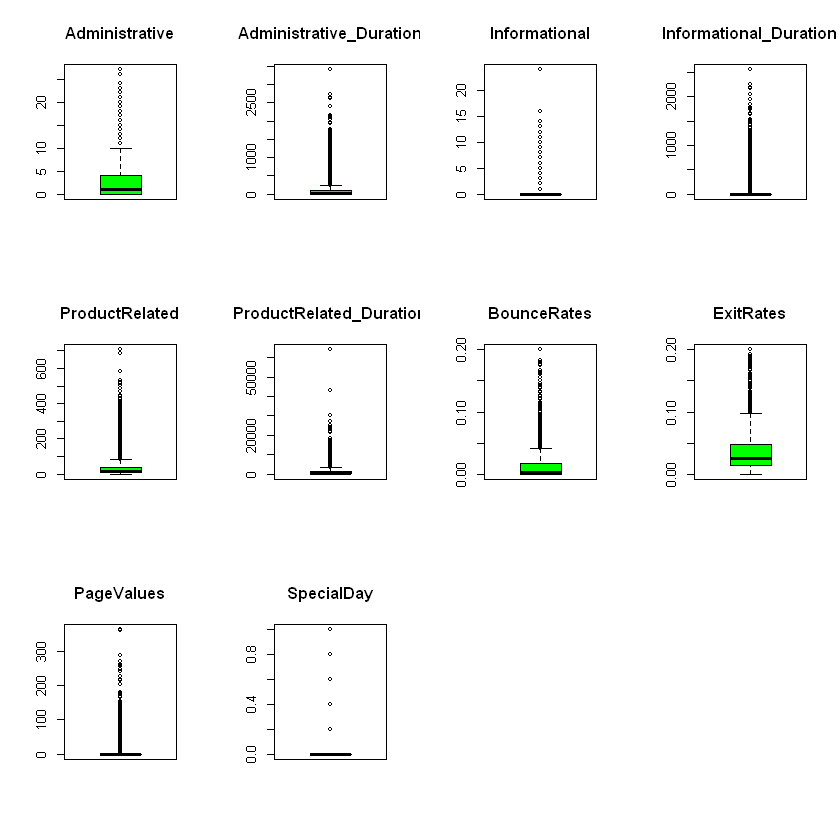

In [19]:
par(mfrow=c(3,4))
for(i in 1:10) {
    boxplot(shoppers[,i], main=names(shoppers)[i], col = "green")} # this is for loop to loop through the first 10 columns and return boxplots for each column

* as noted above there exists oultiers in all the first columns
* we will not drop the outliers as we are running an unsupervised learning problem which does not require datasets with outliers 

## Exploratory data Analysis

### Univariate Analysis

In [20]:
summary(shoppers$BounceRates)#returns measures of central tendency for the specified dataset

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00293 0.02045 0.01667 0.20000 

* checking the measures of central tendency for the bouncerates column

In [22]:
table(shoppers$Revenue)# counts the number of unique values in the data provided


FALSE  TRUE 
10291  1908 

* the revenue column is highly skewed towards false with less than 10% of all interactions ending in a purchase 
* this shows that most customers who visit the site do not actually buy anything

#### Univariate Analysis Visualisations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


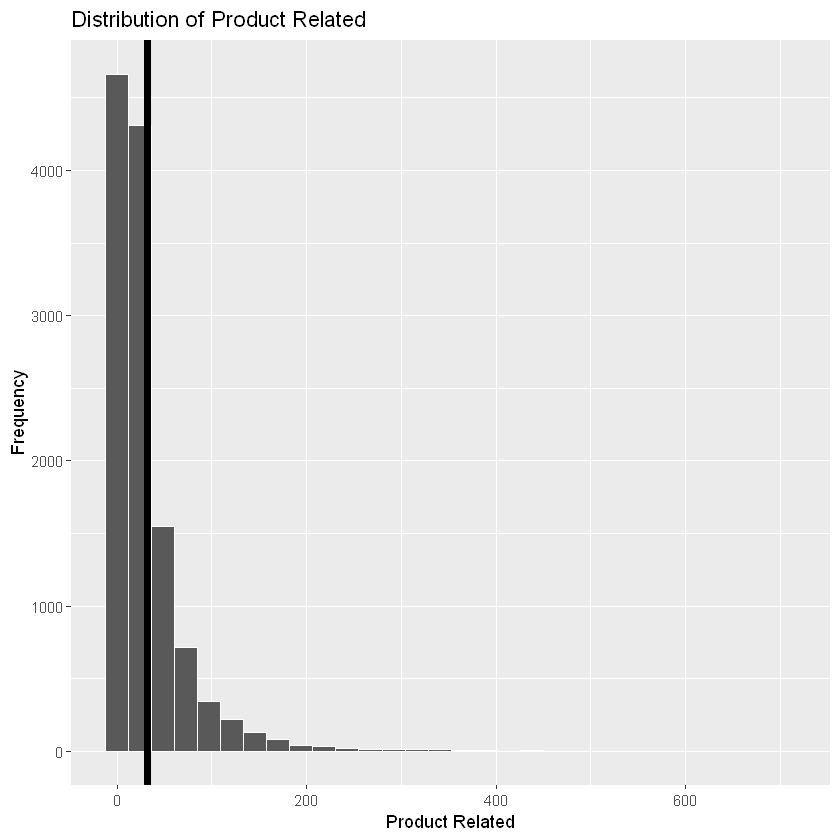

In [23]:
shoppers %>% # creating a data pipeline for the product related column to create a histogram 
    ggplot(aes(ProductRelated)) +
    geom_histogram(color = "white") +
    geom_vline(xintercept = mean(shoppers$ProductRelated), lwd = 2) +
    labs(title = "Distribution of Product Related",
         x = "Product Related",
         y = "Frequency")


* the product related column is highly skewed to the left with the black line indicating the mean value for the column
* this is mostly due to the presence of outliers in the dataset

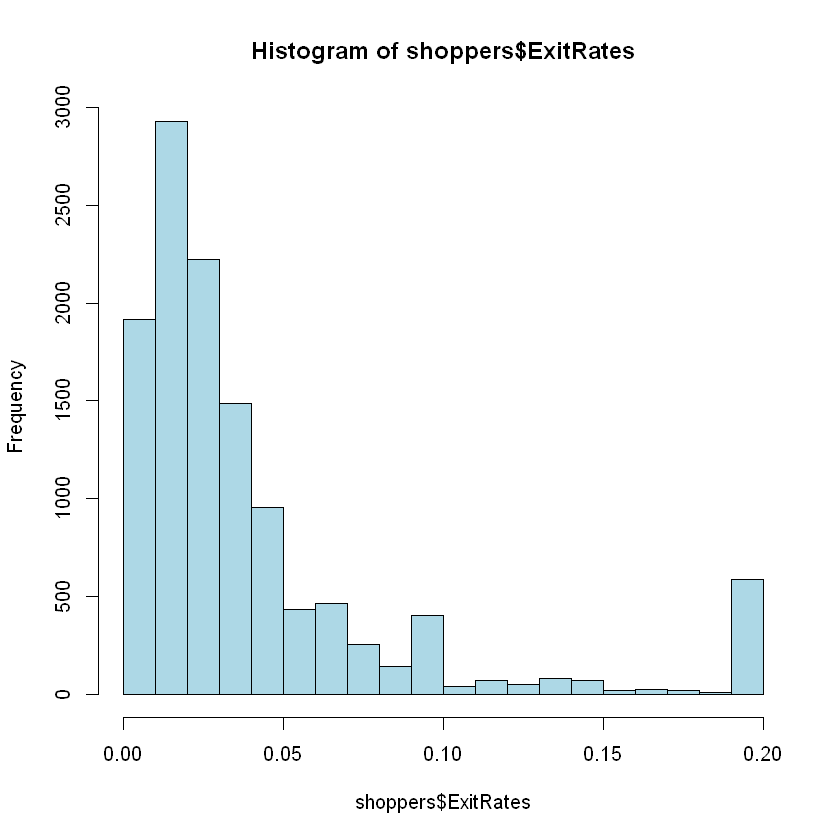

In [24]:
hist(shoppers$ExitRates,
    col = "lightblue")

* the exit rates column is skewed to the left with a significant uptick at the extreme end of the histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


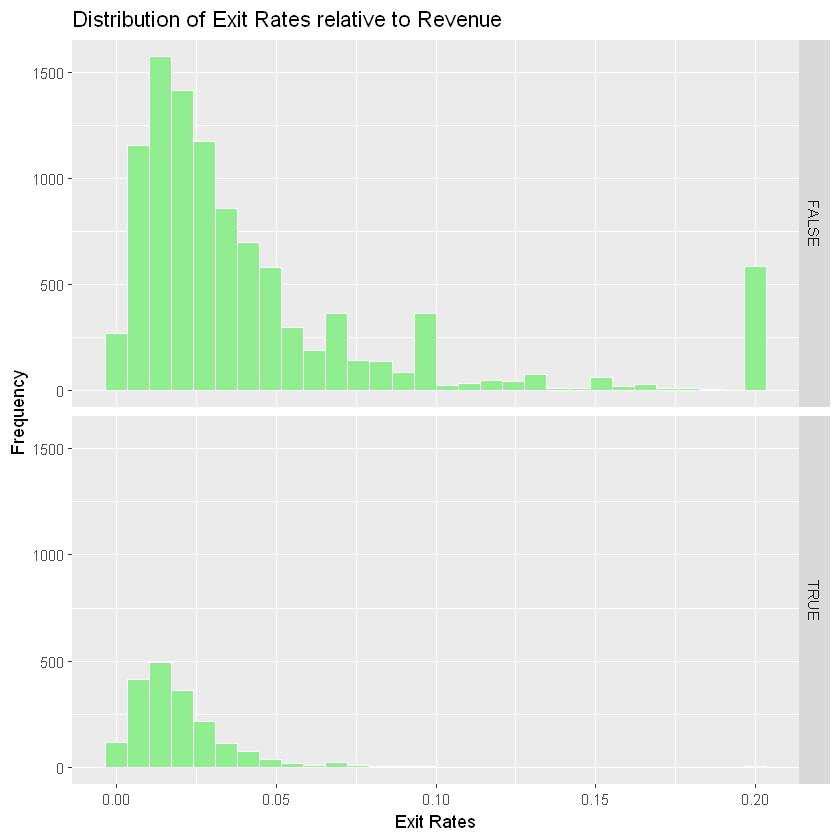

In [25]:
shoppers %>% # creating a data pipeline for the exit rates column comparing it to the revenue column
    ggplot(aes(ExitRates)) +
    geom_histogram(color = "white",fill = "lightgreen") +
    labs(title = "Distribution of Exit Rates relative to Revenue",
         x = "Exit Rates",
         y = "Frequency") +
    facet_grid(Revenue~.)

* the histograms above indicate the skewness in the data for the revenue column,indicating the minimal amount of values in true revenue vs false revenue
* we can also see the huge uptick in the far right of the histogram is mostly caused by visitors who did not buy anything

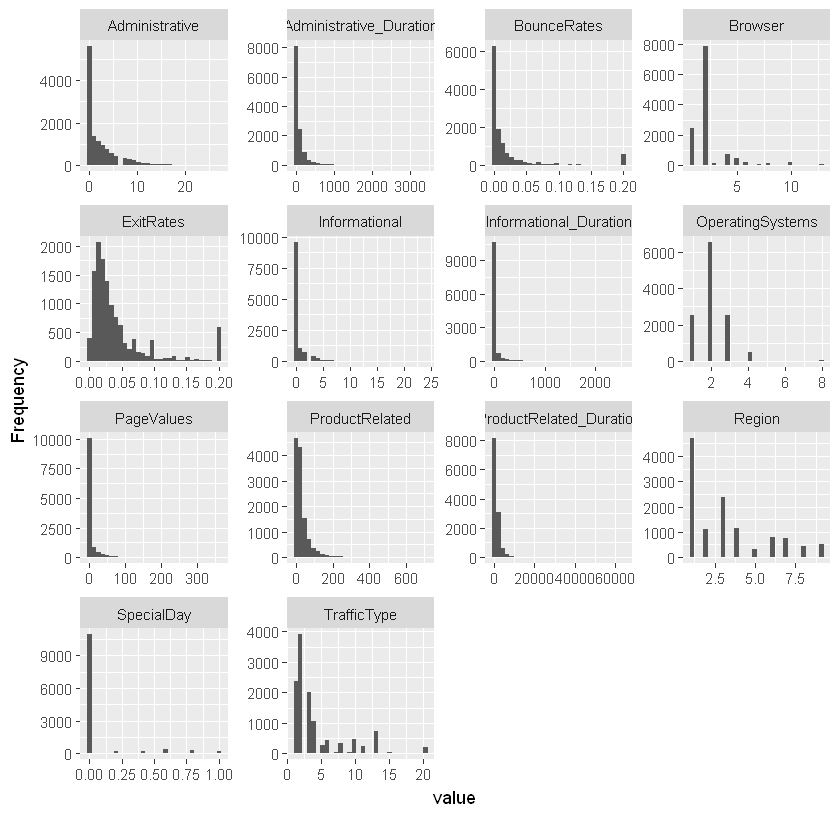

In [26]:
plot_histogram(shoppers)#plotting histograms of the numeric columns

* majority of the histograms are skewed towards the left 

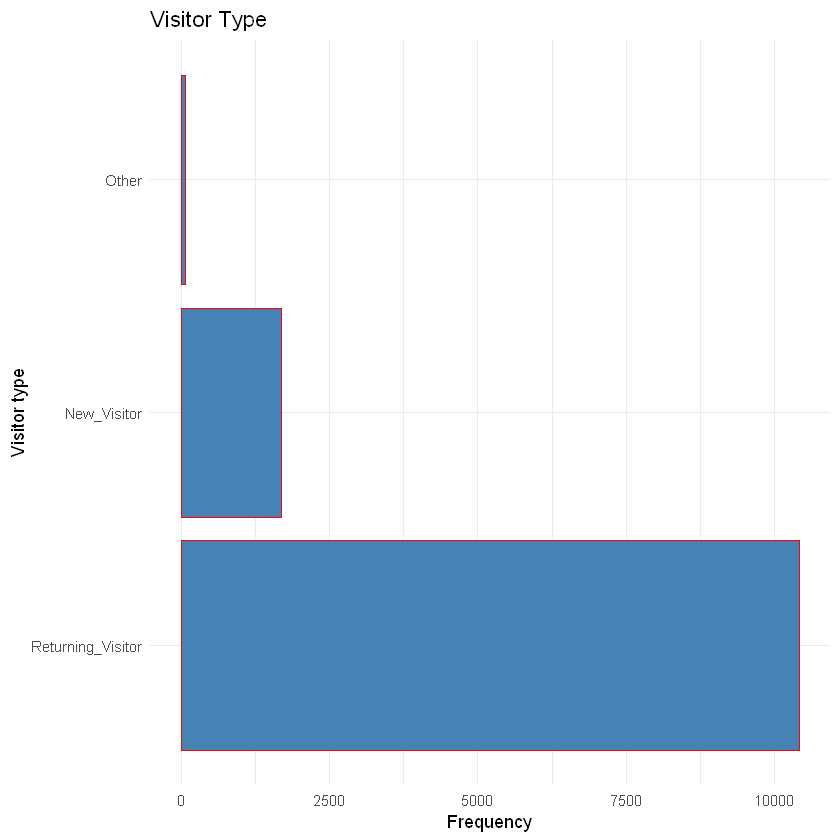

In [27]:
shoppers %>%
    ggplot() +
    geom_bar(aes(fct_infreq(VisitorType)), color = "red", fill = "steelblue" ) +
    coord_flip() +
    labs(title = "Visitor Type",
         x = "Visitor type",
         y = "Frequency")+
    theme_minimal() # creating bar plots of the values in the visitor type column

* it appears that majority of the visitors to the site are returning visitors with the second highest group being the new visitors
* this indicates that churn rate is low 
* they should invest more in marketing to attract more new visitors

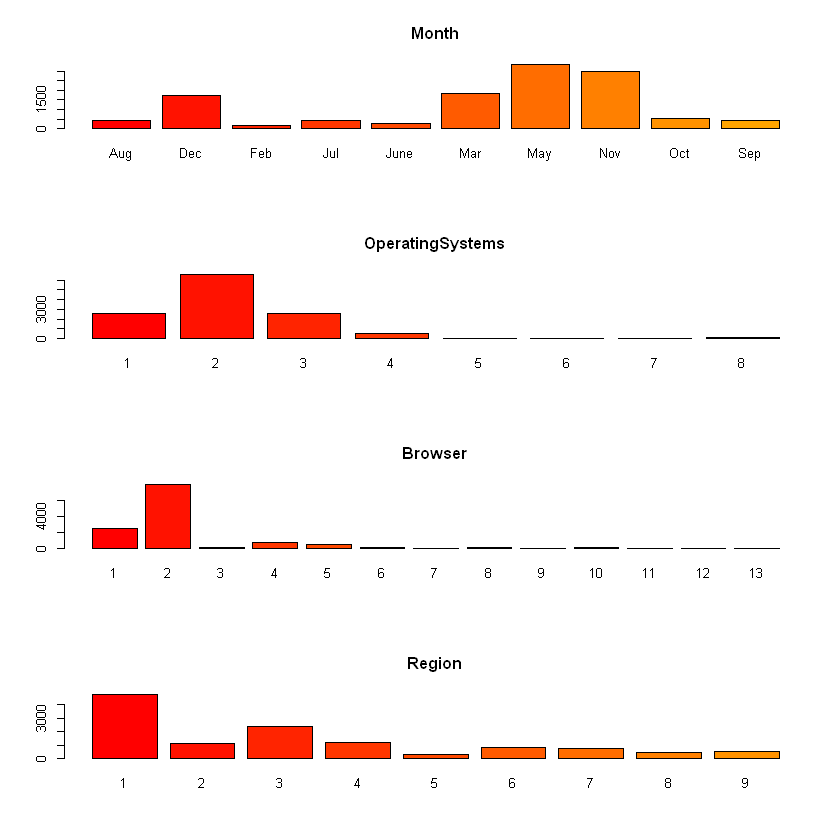

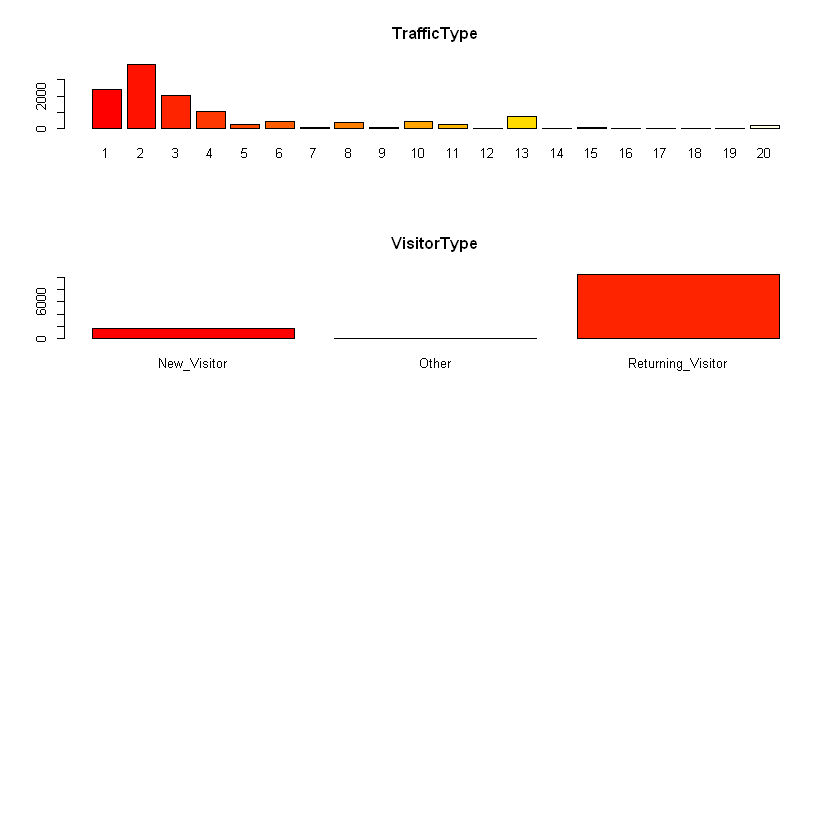

In [28]:
par(mfrow=c(4,1))
for(i in 11:16) {
    counts <- table(shoppers[,i])
    name <- names(shoppers)[i]
    barplot(counts, main=name, col = heat.colors(20))}#creating countplots of the individual values in column 11-16

* there appears to be a huge uptick in visitors in the months of march,may and november

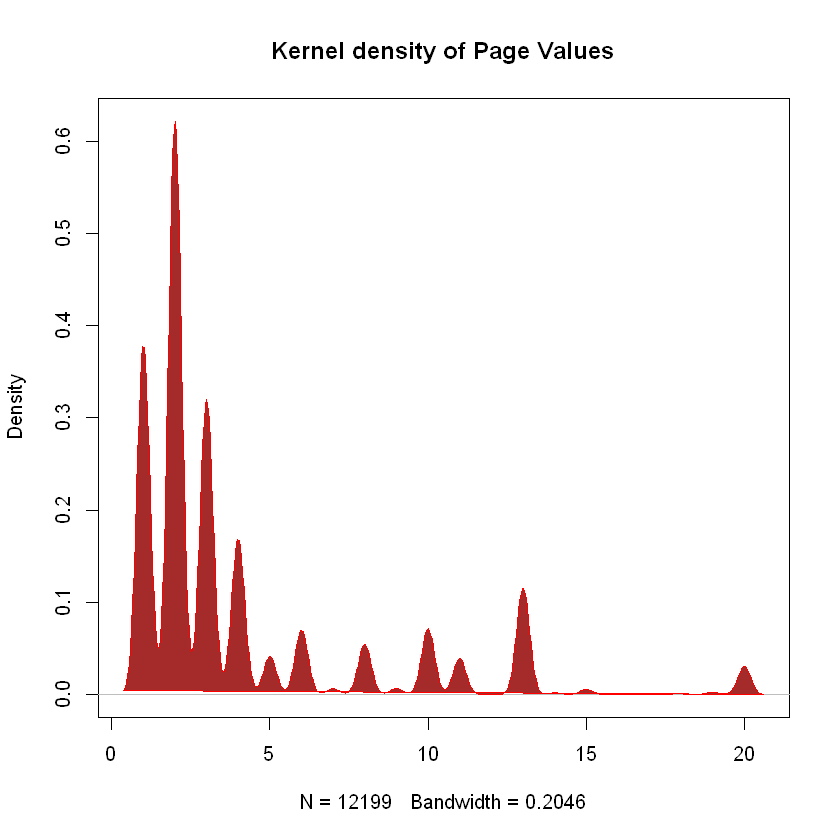

In [44]:
d <- density(shoppers$TrafficType)
plot(d, main = "Kernel density of Page Values")
polygon(d, col = "brown", border = "red")

* it appears most traffic type is categorical less than 5 

### Bivariate and Multivariate Analysis

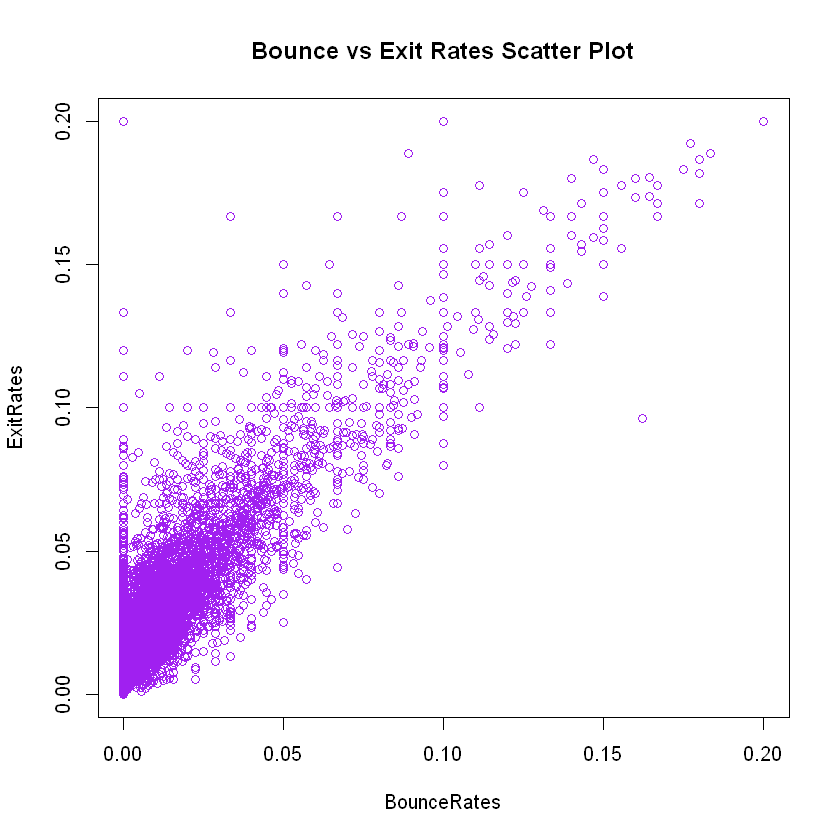

In [29]:
plot(ExitRates ~ BounceRates, dat = shoppers, 
      col = "purple",
      main = "Bounce vs Exit Rates Scatter Plot")

* the bounce rates and exit rates seem to be highly positively correlated

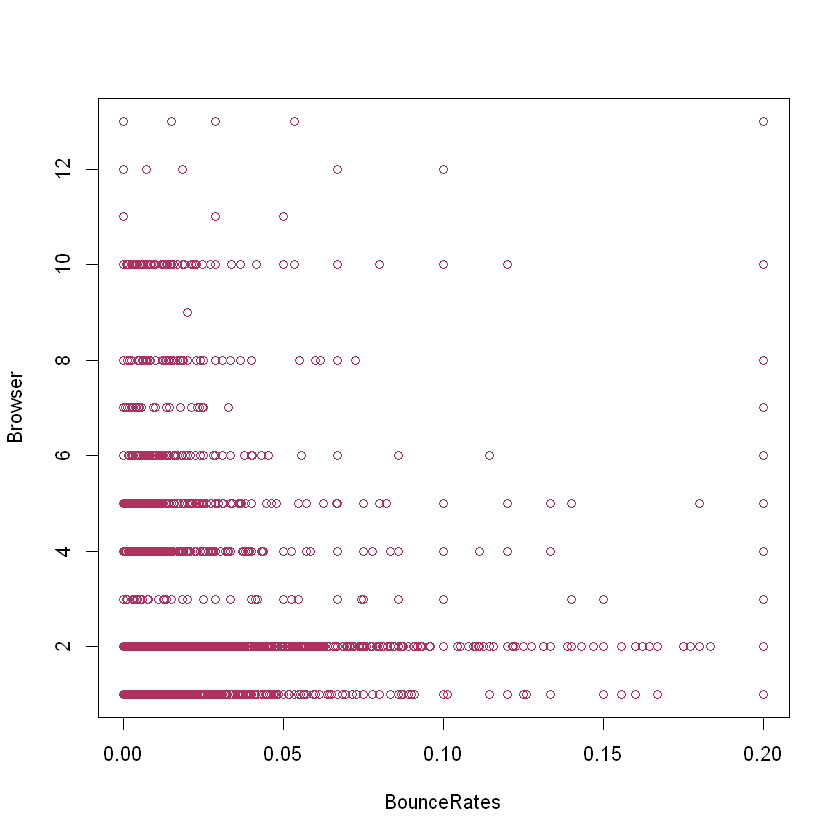

In [34]:
plot(Browser~BounceRates,dat= shoppers,col = "maroon")

* it appears that most bounce rates come from browser type 1 and 2 

In [31]:
head(shoppers)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


Warning message:
"Using size for a discrete variable is not advised."

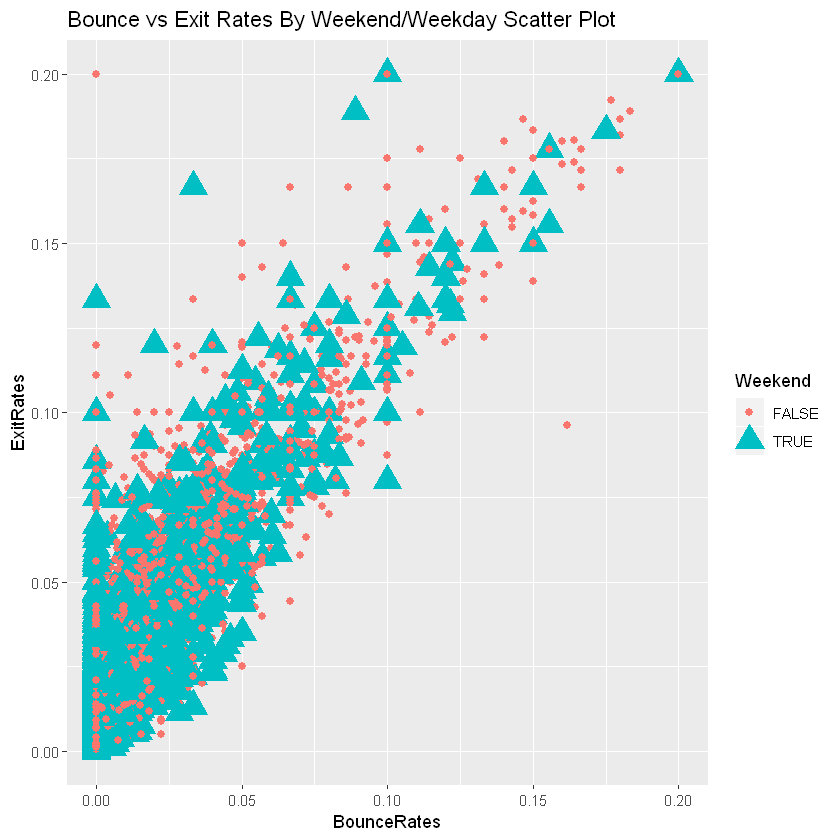

In [45]:
ggplot(shoppers, aes(x=BounceRates, y=ExitRates, shape= Weekend, color= Weekend, size= Weekend)) +
  geom_point()+
  labs(title = "Bounce vs Exit Rates By Weekend/Weekday Scatter Plot")

* scatter plot of bounce rates and exit rates with weekend column

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 10. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 7308 rows containing missing values (geom_point)."

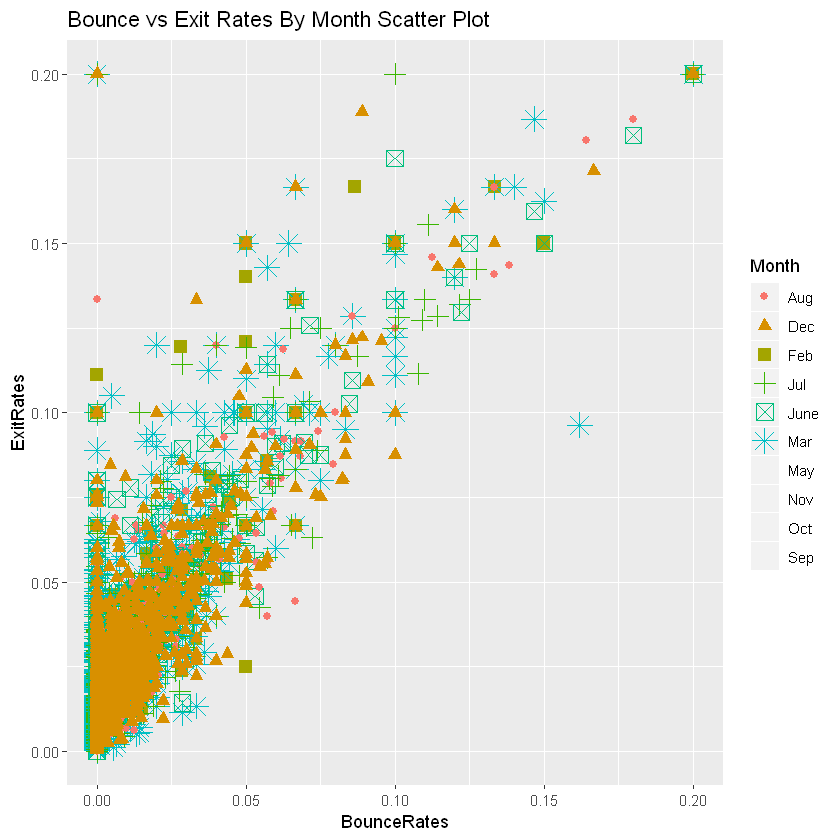

In [46]:
ggplot(shoppers, aes(x=BounceRates, y=ExitRates, shape= Month, color= Month, size= Month)) +
  geom_point()+
  labs(title = "Bounce vs Exit Rates By Month Scatter Plot")

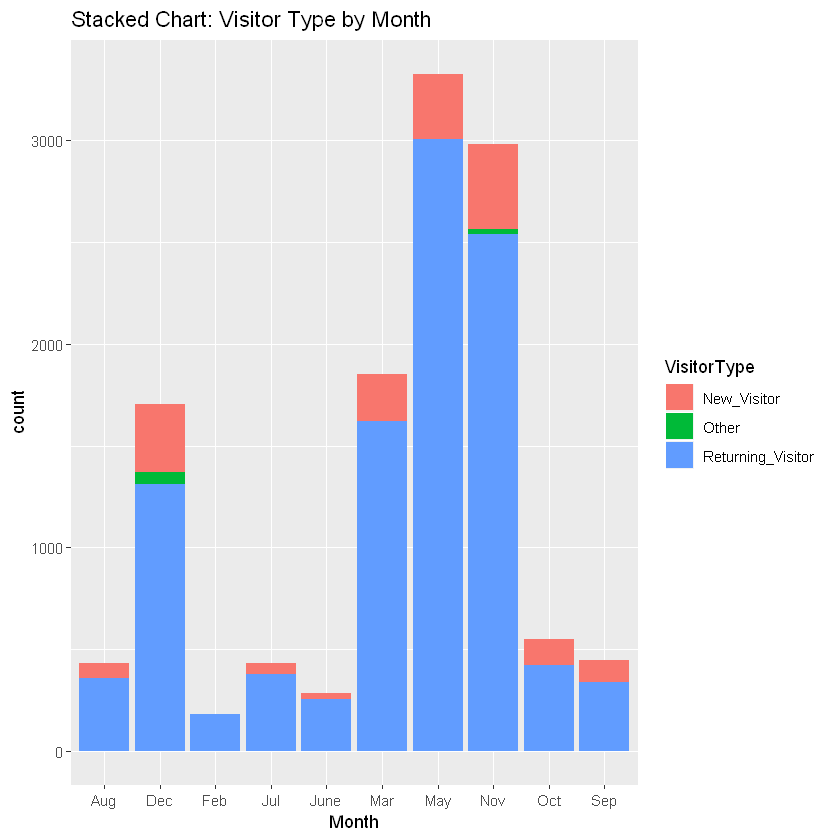

In [47]:
shoppers %>%
    ggplot(aes(Month)) +
    geom_bar(aes(fill = VisitorType))+
    labs(title = "Stacked Chart: Visitor Type by Month")

* as noted above there appears to be ahuge uptick in visitor numbers to the site on the months of march,may and november
* these months correspond to the most important holidays in russia(kira_plastininas home country)
* with March being women's day which is a national holiday and thus mostly observed by the brand's mostly female clientele,May being victory which is an important holiday commemorating victory in world war 2,and November being unity day

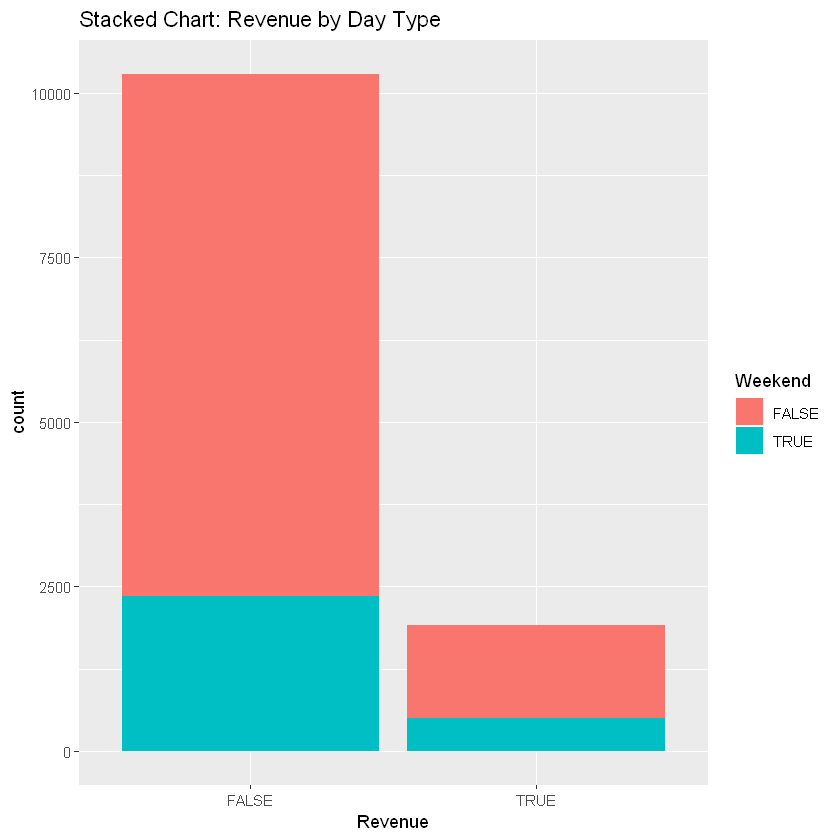

In [48]:
shoppers %>%
    ggplot(aes(Revenue)) +
    geom_bar(aes(fill = Weekend))+
    labs(title = "Stacked Chart: Revenue by Day Type")

* it appears that most visitors come during the weekdays as opposed to the weekend with this fact holding whether or not they make a purchase

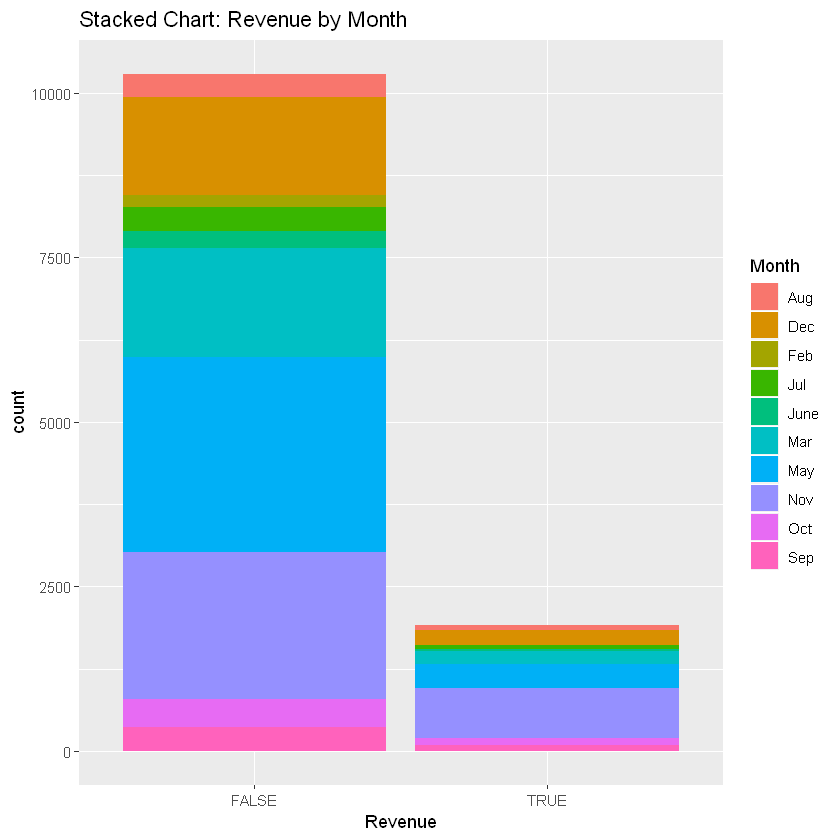

In [49]:
shoppers %>%
    ggplot(aes(Revenue)) +
    geom_bar(aes(fill = Month))+
    labs(title = "Stacked Chart: Revenue by Month")

* most of the positive revenue appears to come from the months of nov,may and march in that order which means that unity day appears to be the most profitable day 

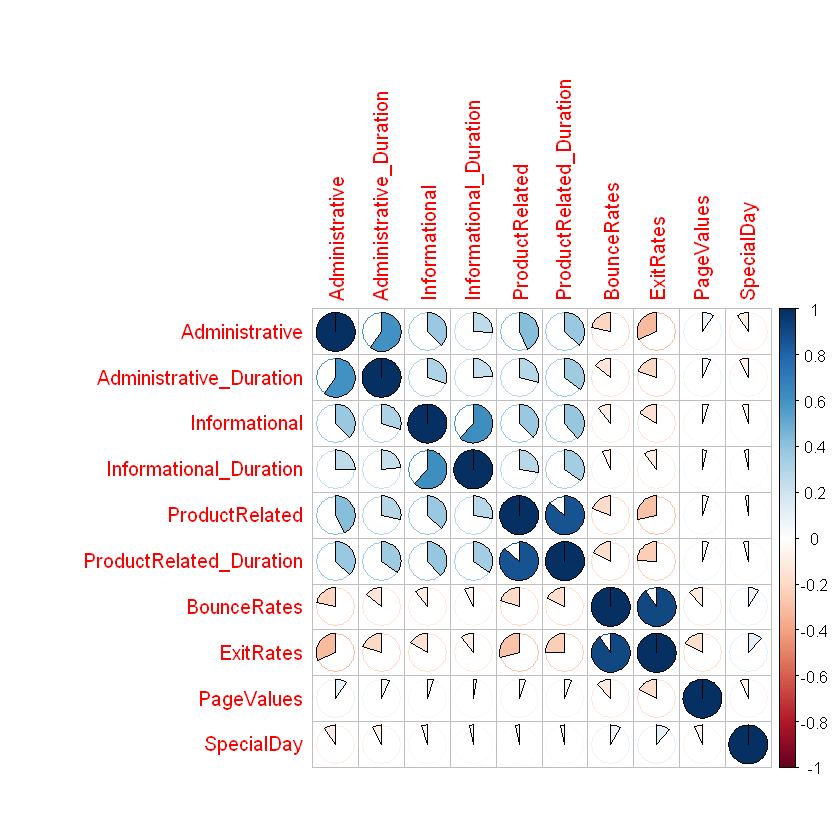

In [51]:
correlations <- cor(shoppers[,1:10])
# create correlation plot
corrplot(correlations, method="pie")

## Modelling

### K-Means Clustering

In [54]:
dmy = dummyVars(" ~ .", data = shoppers)

shoppers2 = data.frame(predict(dmy, newdata = shoppers))#label encoding the factor columns

* label encoding the factor columns

In [65]:
shoppers2_copy <- shoppers2[, -c(30:31)]# selcting all columns except the revenue class column
shoppers.class<- shoppers[, "Revenue"]
# creating the class column which will be the revenue column

In [58]:
shoppers_norm <- as.data.frame(apply(shoppers2_copy, 2, function(x) (x - min(x))/(max(x)-min(x))))# normalizing the dataset 

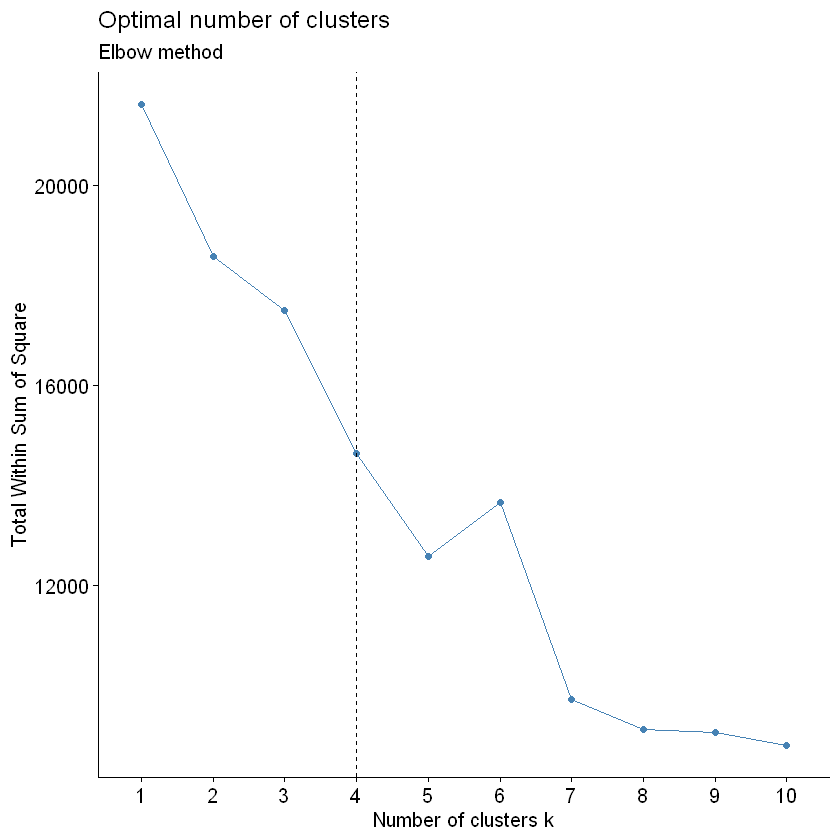

In [60]:
fviz_nbclust(shoppers_norm, kmeans, method = "wss") +
    geom_vline(xintercept = 4, linetype = 2)+
  labs(subtitle = "Elbow method")# the fviz_nbclust method allows us to calculate the optimum number of clusters to use for the kmeans

* it appears that the optimum number of clusters to use is 10 

In [61]:
result <- kmeans(shoppers_norm, 10)#calculating the kmeans

In [62]:
result$size

[1] 1530 1852  622  475 1082  791 1900 1730 1237  980

In [63]:
result$centers

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,MonthSep,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNew_Visitor,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendFALSE,WeekendTRUE
0.10273542,0.02699872,0.02045207,0.013783811,0.05352802,0.020823101,0.11843101,0.2249545,0.013743668,0.021699346,...,0.17385621,0.1555556,0.11437908,0.2751634,0.1476436,0.0000000,0.0006535948,0.9993464,1.0000000,0.0000000
0.09831214,0.02756073,0.02909017,0.019930541,0.05548228,0.022718164,0.10334965,0.2002827,0.017327454,0.005291577,...,0.03995680,0.1620642,0.10421166,0.2688310,0.1691486,0.0000000,0.0037796976,0.9962203,0.0000000,1.0000000
0.09336668,0.02725178,0.01393355,0.007671444,0.02570751,0.010157133,0.02606013,0.1033522,0.031374461,0.054983923,...,0.03536977,0.1529628,0.11160236,0.2980305,0.1479100,1.0000000,0.0000000000,0.0000000,0.3762058,0.6237942
0.07766082,0.02124794,0.01885965,0.013769189,0.03002613,0.013117934,0.06331099,0.1669631,0.014282993,0.000000000,...,0.00000000,0.1624060,0.09666667,0.2323684,0.1329640,0.1915789,0.0000000000,0.8084211,0.0000000,1.0000000
0.08632847,0.02462086,0.02518484,0.019262633,0.04568503,0.020425726,0.09927998,0.2132824,0.018498864,0.000000000,...,0.00000000,0.1862952,0.14548675,0.3046442,0.1773519,0.0000000,0.0489833641,0.9510166,1.0000000,0.0000000
0.04410732,0.01073733,0.01121997,0.006957168,0.04025787,0.014733184,0.19644541,0.3272191,0.004939280,0.734766119,...,0.00000000,0.1681416,0.11831016,0.2449431,0.2044048,0.0000000,0.0000000000,1.0000000,0.8217446,0.1782554
0.09918129,0.02746028,0.02750000,0.017330354,0.06974916,0.029651474,0.10820583,0.2084703,0.017253634,0.000000000,...,0.00000000,0.1606015,0.10614035,0.2479605,0.1767313,0.0000000,0.0105263158,0.9894737,1.0000000,0.0000000
0.07771355,0.02259819,0.01931599,0.011716338,0.03786988,0.016081015,0.11664367,0.2286881,0.014407696,0.056416185,...,0.00000000,0.1620149,0.11498073,0.2719653,0.1815637,0.0000000,0.0000000000,1.0000000,1.0000000,0.0000000
0.06446301,0.01988008,0.01704392,0.012401783,0.02856029,0.013256221,0.10695635,0.2331758,0.008564211,0.000000000,...,0.00000000,0.1540594,0.11385071,0.2649555,0.1039867,0.0000000,0.0000000000,1.0000000,1.0000000,0.0000000
0.09399093,0.02682912,0.01322279,0.007369356,0.02569257,0.009849084,0.02629039,0.1047299,0.029675714,0.000000000,...,0.08775510,0.1412536,0.10705782,0.2817602,0.1506445,1.0000000,0.0000000000,0.0000000,1.0000000,0.0000000


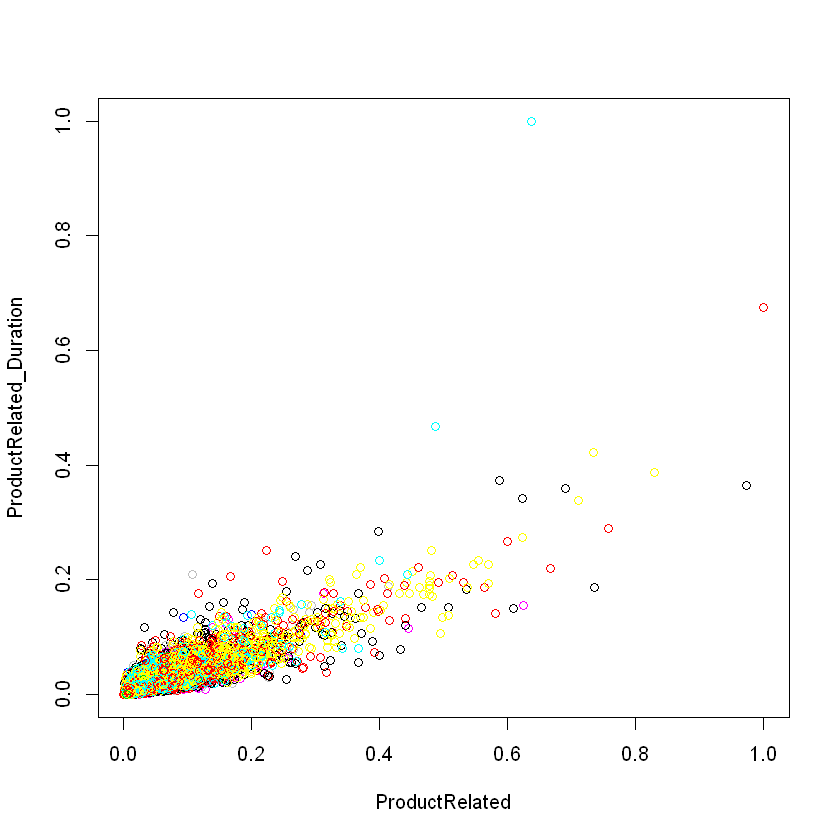

In [64]:
plot(shoppers_norm[,5:6],col=result$cluster)

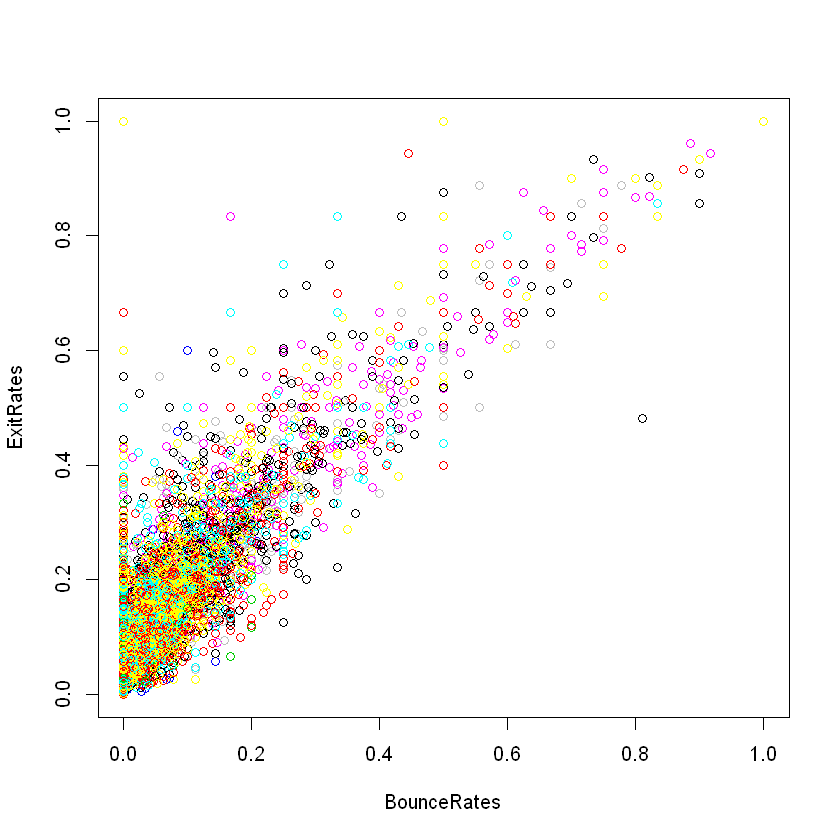

In [68]:
plot(shoppers_norm[,7:8], col = result$cluster)

In [66]:
table(result$cluster,shoppers.class)

    shoppers.class
     FALSE TRUE
  1   1316  214
  2   1518  334
  3    464  158
  4    410   65
  5    967  115
  6    750   41
  7   1441  459
  8   1563  167
  9   1134  103
  10   728  252

* there appears to be 10 clusters that have been discovered in kmeans

### Hierachical clustering

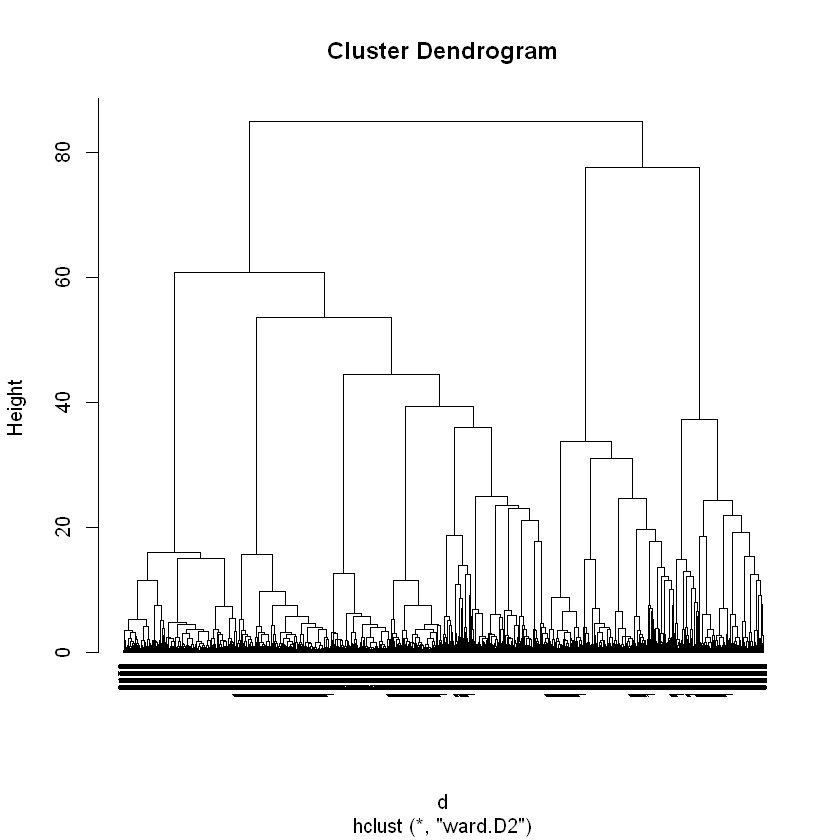

In [69]:
d <- dist(shoppers_norm,method="euclidian")

res.hc <- hclust(d, method = "ward.D2")

plot(res.hc, cex = 0.6, hang = -1)